In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
start=0
end=1
step=0.02

weight=0.7
bias=0.3
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(0.8*len(X))
train_split

40

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

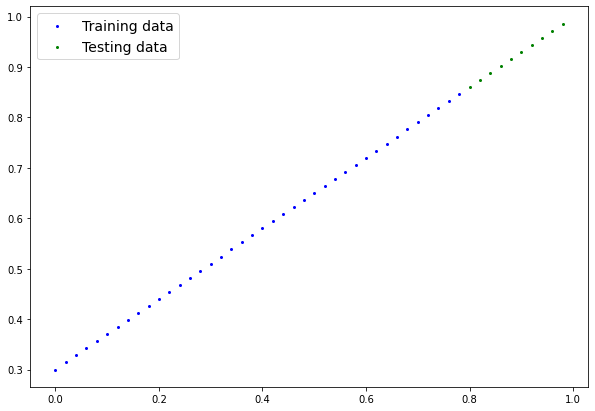

In [ ]:
plot_predictions();

In [ ]:
!nvidia-sim

/bin/bash: nvidia-sim: command not found


In [ ]:
from torch import nn
import torch

In [ ]:

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias

In [ ]:
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#find out list parameter value
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
#Making prediction using torch.inference_mode()



with torch.inference_mode():
  y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

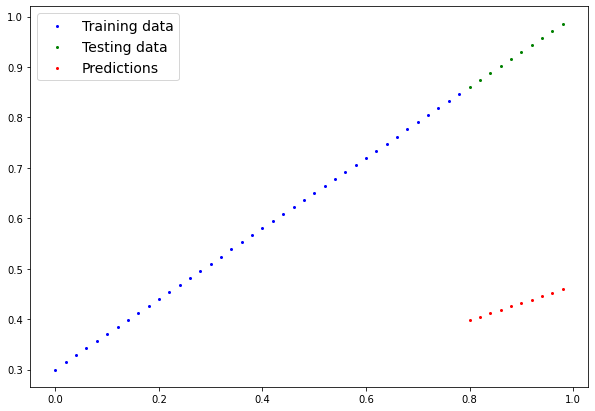

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
########### Now set up a loss function to see how wrong our model is

loss_fn = nn.L1Loss( )

#########v Now set up a optimizer function to optimize the model
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01,momentum=0.9)

In [ ]:
torch.manual_seed(42)
epochs=100

for epoch in range(epochs):
  model_0.train()
  y_pred=model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  print(f"Loss {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



  ################################  Testing     ################################
  model_0.eval()
  with torch.inference_mode(): # this will turn off gradient tracking and couple more things
    # with torch.no_grad(): # It is used in old version of pytorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

    # Print out what's happening
    if epoch % 10==0:
      print(f"Epoch:{epoch}  | Loss:{loss}  | Test_losss:{test_loss}")
      print(model_0.state_dict())

Loss 0.31288138031959534
Epoch:0  | Loss:0.31288138031959534  | Test_losss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss 0.3013603389263153
Loss 0.27947044372558594
Loss 0.24824854731559753
Loss 0.2086278200149536
Loss 0.16144821047782898
Loss 0.10788238048553467
Loss 0.06537707895040512
Loss 0.05091674253344536
Loss 0.06787853688001633
Loss 0.10313145816326141
Epoch:10  | Loss:0.10313145816326141  | Test_losss:0.026505161076784134
OrderedDict([('weights', tensor([0.4982])), ('bias', tensor([0.5061]))])
Loss 0.12741199135780334
Loss 0.13774344325065613
Loss 0.13552074134349823
Loss 0.12199928611516953
Loss 0.09830901771783829
Loss 0.06750769913196564
Loss 0.04827551916241646
Loss 0.04651679843664169
Loss 0.05649535730481148
Loss 0.06960087269544601
Epoch:20  | Loss:0.06960087269544601  | Test_losss:0.1943041831254959
OrderedDict([('weights', tensor([0.4652])), ('bias', tensor([0.3147]))])
Loss 0.07842990010976791
Loss 0.07919305562973

In [ ]:
  with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7081])), ('bias', tensor([0.2911]))])

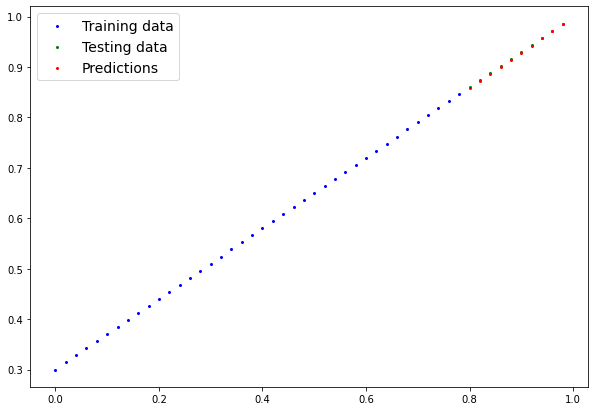

In [ ]:
plot_predictions(predictions = y_preds_new) 

### Saving a model in PyTorch

 PyTorch method	                         What does it do?

1. torch.save	                     Saves a serialzed object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
2. torch.load	                      Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
3. torch.nn.Module.load_state_dict	 Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

In [ ]:
# Saving the Pytorch Model
from pathlib import Path

#1. Create model's directory
model_path = Path("models")
model_path.mkdir(parents=True,exist_ok=True) 
#2. Create model save path
model_name = "01_pytorch_nn.pth"
model_save_path = model_path/model_name

#3. save the model state dict

print(f"Saving model to:{model_save_path}")
torch.save(model_0.state_dict(),model_save_path)



Saving model to:models/01_pytorch_nn.pth


Since we've now got a saved model state_dict() rather the entire model at models/01_pytorch_nn.pth we can now load it in using torch.nn.Module.load_state_dict(torch.load(f)) where f is the filepath of our saved model state_dict().

In [ ]:
# check out last times model's state dict parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.7081])), ('bias', tensor([0.2911]))])

In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(model_save_path))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7081])), ('bias', tensor([0.2911]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  y_pred_loaded_model= loaded_model_0(X_test)
y_pred_loaded_model

tensor([[0.8575],
        [0.8717],
        [0.8858],
        [0.9000],
        [0.9142],
        [0.9283],
        [0.9425],
        [0.9567],
        [0.9708],
        [0.9850]])

In [ ]:
y_preds_new

tensor([[0.8575],
        [0.8717],
        [0.8858],
        [0.9000],
        [0.9142],
        [0.9283],
        [0.9425],
        [0.9567],
        [0.9708],
        [0.9850]])

In [ ]:
y_preds_new==y_pred_loaded_model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

**6. All Together**

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# Setup device
if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"
print(f"using device:{device}")

using device:cpu


In [ ]:
# Data Processing
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

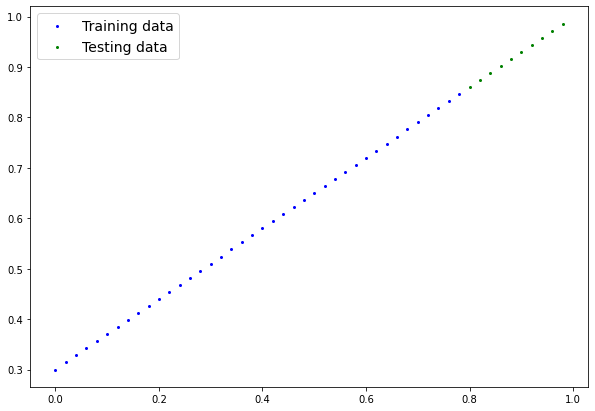

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
# build model
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()    

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

For Training we need:


*   Loss Function
*   Optimizer
*   Training Loop
*   Testing Loop




In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 100

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Train loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Train loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Train loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Train loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Train loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Train loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Train loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Train loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Train loss: 0.009653178043663502 | Test loss: 0.02167237363755703


In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6691]])),
             ('linear_layer.bias', tensor([0.3130]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


**Making predictions**

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8483],
        [0.8617],
        [0.8750],
        [0.8884],
        [0.9018],
        [0.9152],
        [0.9286],
        [0.9420],
        [0.9553],
        [0.9687]])

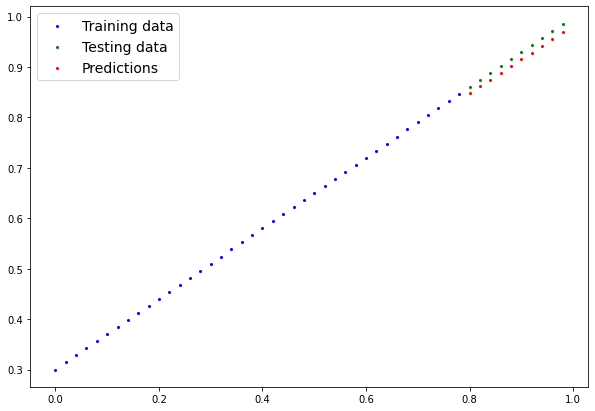

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

**Saving and loading a model**

In [ ]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_nn_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_nn_2.pth


In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

 Create a straight line dataset using the linear regression formula (weight * X 

1.   Create a straight line dataset using the linear regression formula (weight * X + bias).
  + Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total
  + Split the data into 80% training, 20% testing.
  + Plot the training and testing data so it becomes visual.

2.   Build a PyTorch model by subclassing nn.Module.
 + Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
 + Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
 + Once you've constructed the model, make an instance of it and check its state_dict().
 + Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can. 



3.   Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
 + Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters             from the model you created in 2.
 + Write a training loop to perform the appropriate training steps for 300 epochs.
 + The training loop should test the model on the test dataset every 20 epochs.

4.   Make predictions with the trained model on the test data.
 +  Visualize these predictions against the original training and testing data (note: you may need to make sure the             predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).


5.   Save your trained model's state_dict() to file.
 + Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
  + Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

        
        

# 1.1

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [ ]:
weight=0.3 
bias=0.9
start=0
end=1
step=0.01

In [ ]:
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X+bias

In [ ]:
len(X)

100

In [ ]:
split = int((len(X)*0.8))
split

80

In [ ]:
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
len(X_train)

80

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

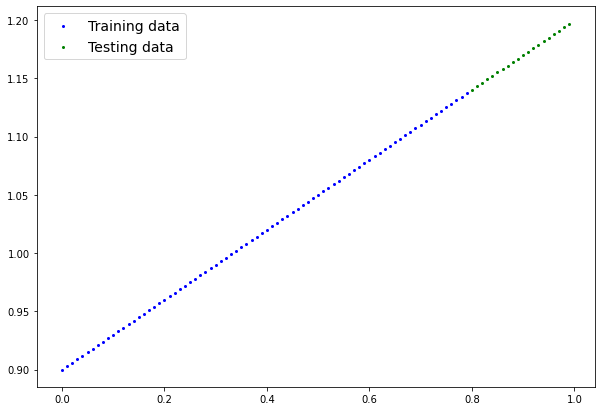

In [ ]:
plot_predictions()

In [ ]:
# build model
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    # Define the forward computation (input data x flows through nn.Linear())
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
  torch.manual_seed(42)
  model_1 = LinearRegressionModelV2()

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 300

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()
    if epochs%20==0:
      ### Testing
      model_1.eval() # put the model in evaluation mode for testing (inference)
      # 1. Forward pass
      with torch.inference_mode():
          test_pred = model_1(X_test)
      
          # 2. Calculate the loss
          test_loss = loss_fn(test_pred, y_test)
          print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.011264790780842304 | Test loss: 0.02564847469329834
Epoch: 1 | Train loss: 0.010922081768512726 | Test loss: 0.02488369308412075
Epoch: 2 | Train loss: 0.01057937927544117 | Test loss: 0.024118900299072266
Epoch: 3 | Train loss: 0.010236674919724464 | Test loss: 0.02335413172841072
Epoch: 4 | Train loss: 0.009893960319459438 | Test loss: 0.02258932590484619
Epoch: 5 | Train loss: 0.009551259689033031 | Test loss: 0.02182454988360405
Epoch: 6 | Train loss: 0.009209314361214638 | Test loss: 0.02071581408381462
Epoch: 7 | Train loss: 0.008866818621754646 | Test loss: 0.019951004534959793
Epoch: 8 | Train loss: 0.008524121716618538 | Test loss: 0.019186222925782204
Epoch: 9 | Train loss: 0.008181417360901833 | Test loss: 0.018421489745378494
Epoch: 10 | Train loss: 0.007838688790798187 | Test loss: 0.017656642943620682
Epoch: 11 | Train loss: 0.007495990488678217 | Test loss: 0.01689189113676548
Epoch: 12 | Train loss: 0.007153290323913097 | Test loss: 0.0161270853

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.1507],
        [1.1538],
        [1.1568],
        [1.1599],
        [1.1630],
        [1.1660],
        [1.1691],
        [1.1721],
        [1.1752],
        [1.1783],
        [1.1813],
        [1.1844],
        [1.1875],
        [1.1905],
        [1.1936],
        [1.1966],
        [1.1997],
        [1.2028],
        [1.2058],
        [1.2089]])

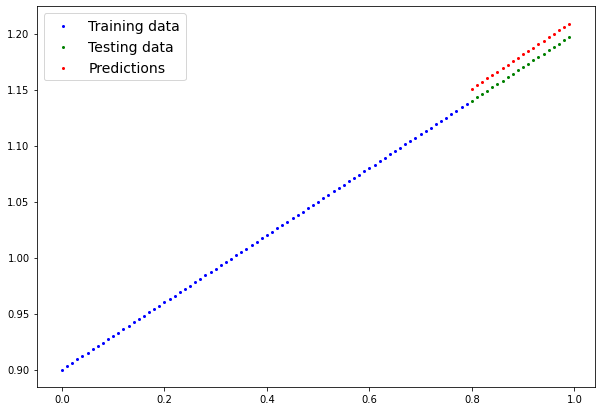

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_practice_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_practice_model.pth


In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_practice = LinearRegressionModelV2()

# Load model state dict 
loaded_model_practice.load_state_dict(torch.load(MODEL_SAVE_PATH))


print(f"Loaded model:\n{loaded_model_practice}")
print(f"Model on device:\n{next(loaded_model_practice.parameters()).device}")
loaded_model_practice.state_dict()

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


OrderedDict([('linear_layer.weight', tensor([[0.3062]])),
             ('linear_layer.bias', tensor([0.9058]))])

In [ ]:

# Make predictions with loaded model and compare them to the previous
y_preds_practice = loaded_model_practice(X_test)
y_preds == y_preds_practice

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
# Turn model into evaluation mode
loaded_model_practice.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds_practice = loaded_model_practice(X_test)
y_preds_practice

tensor([[1.1507],
        [1.1538],
        [1.1568],
        [1.1599],
        [1.1630],
        [1.1660],
        [1.1691],
        [1.1721],
        [1.1752],
        [1.1783],
        [1.1813],
        [1.1844],
        [1.1875],
        [1.1905],
        [1.1936],
        [1.1966],
        [1.1997],
        [1.2028],
        [1.2058],
        [1.2089]])

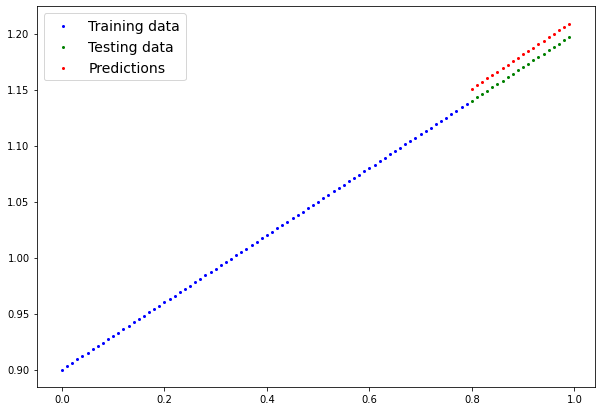

In [ ]:
plot_predictions(predictions=y_preds_practice)